In [1]:
import pandas as pd


In [2]:
datos = pd.read_csv("Absorbancia_VeMN7_5g_limpio.csv")

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      441 non-null    float64
 1   A       414 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [4]:
datos.head()

,nm,A
0,190.0,NaN
1,190.5,NaN
2,191.0,NaN
3,191.5,NaN
4,192.0,NaN


In [5]:
x=datos["nm"]
y=datos["A"]

In [6]:
x

0      190.0
1      190.5
2      191.0
3      191.5
4      192.0
       ...  
436    408.0
437    408.5
438    409.0
439    409.5
440    410.0
Name: nm, Length: 441, dtype: float64

In [7]:
y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
436   NaN
437   NaN
438   NaN
439   NaN
440   NaN
Name: A, Length: 441, dtype: float64

array([[<Axes: title={'center': 'nm'}>, <Axes: title={'center': 'A'}>]],
      dtype=object)

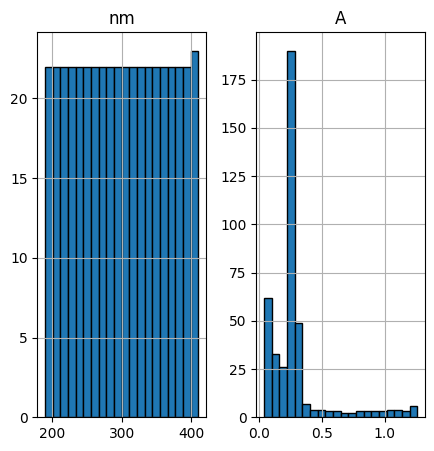

In [9]:
datos.hist(figsize=(5,5), bins=20, edgecolor="black")

<Axes: xlabel='nm', ylabel='A'>

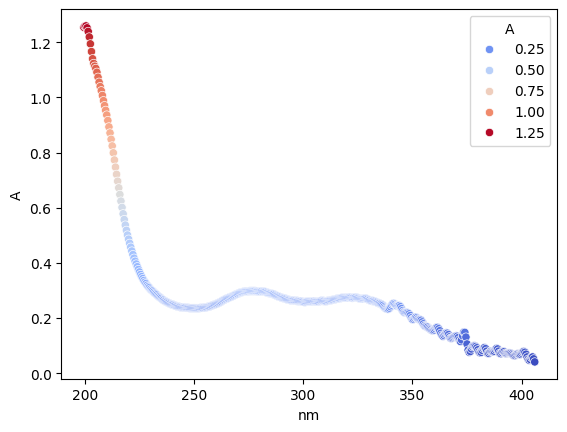

In [11]:
import seaborn as sb
sb.scatterplot(x=x, y=y, data=datos, hue=y, palette="coolwarm")


In [19]:
y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
436   NaN
437   NaN
438   NaN
439   NaN
440   NaN
Name: A, Length: 441, dtype: float64

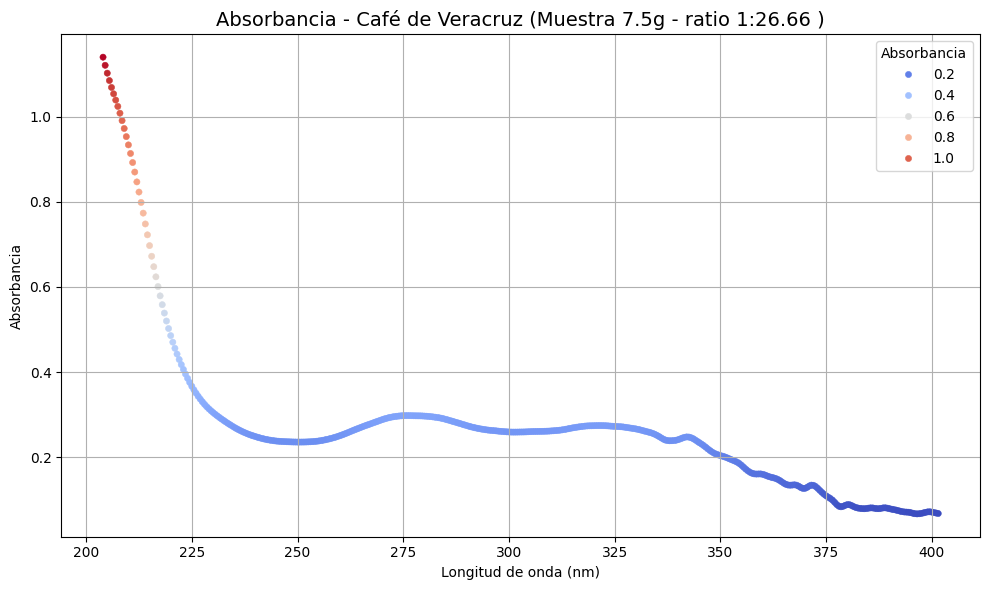

In [30]:
from scipy.signal import savgol_filter
import seaborn as sb
import matplotlib.pyplot as plt

# Creamos una columna suavizada usando Savitzky–Golay filter

datos["A_suave"] = savgol_filter(datos["A"], window_length=19, polyorder=3)

#Graficamos el scatterplot con suavizado y gradiente de color

plt.figure(figsize=(10,6))
sb.scatterplot(x=x, y="A_suave", data=datos, hue="A_suave", palette="coolwarm", s=20, edgecolor=None )
plt.title("Absorbancia - Café de Veracruz (Muestra 7.5g - ratio 1:26.66 )", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.legend(title="Absorbancia", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()



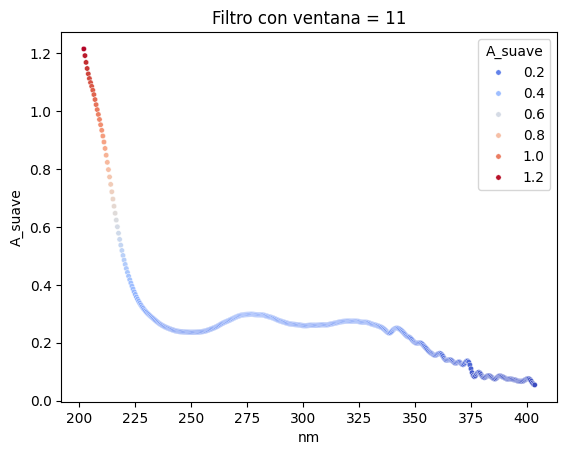

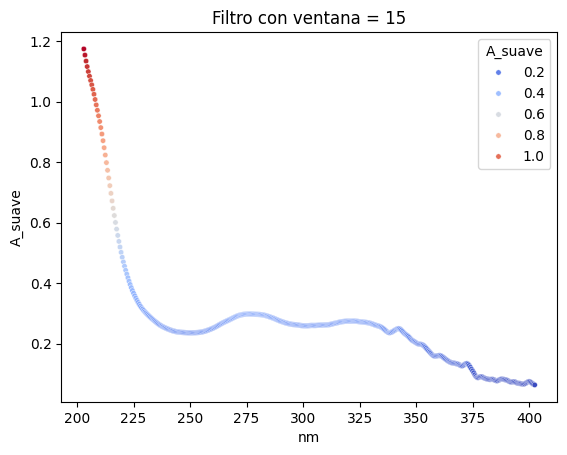

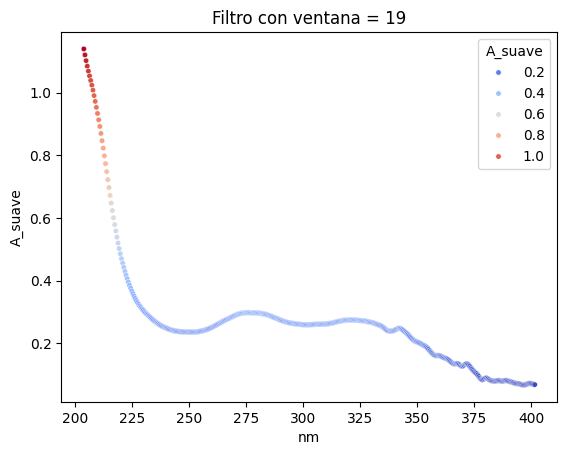

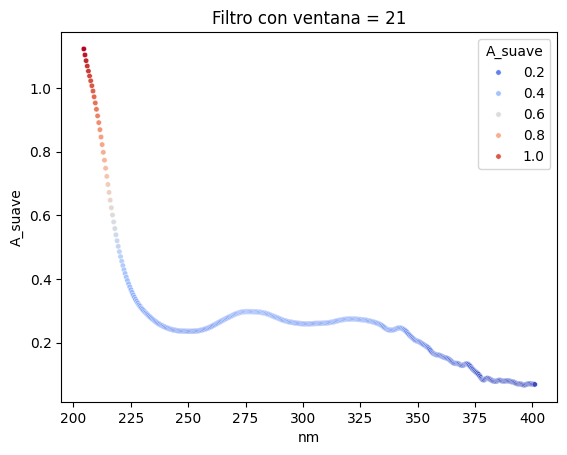

In [28]:
for w in [11, 15, 19, 21]:
    datos["A_suave"] = savgol_filter(datos["A"], window_length=w, polyorder=3)
    plt.figure()
    sb.scatterplot(x='nm', y="A_suave", data=datos, hue="A_suave", palette="coolwarm", s=15)
    plt.title(f"Filtro con ventana = {w}")
    plt.show()
